### Run these first!

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(727)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Alternatives to Heart Disease Diagnosis

### Introduction

Heart disease, also known as cardiovascular disease is the leading cause of death in the United States. The most common type of heart disease is Cornonary Artery disease, which is caused by plaque buildup in the arteries and narrows or blocks blood flow to the heart.

The disease can be diagnosed through an angiogram, which is an X-ray that looks at the heart, major arteries, and blood vessels. Even a typical routine angiogram costs nearly 700 dollars however that price can range from 700-2200 CAD. What if there was an easier and less expensive way to diagnose heart disease?
In this project, we consider attributes that can be observed using only a simple checkup: blood pressure, age, and maximum heart rate. Specifically, we investigate if we can use blood pressure, age, and maximum heart rate to determine if a patient has heart disease.
The entire dataset contains 76 variables, 14 of which we can use for data analysis, varying from identifiers like age or sex to max heart rate. The dataset contains data from 4 different locations: Cleveland, Hungary, Switzerland, and the VA Long Beach. In our analysis, we used all four datasets.


### Methods and Results

The variables of importance were age, resting blood pressure, and maximum heart rate. Observations for these variables can be obtained cheaply, and they appear to have some correlation to the presence of heart disease.
We combine all four data sets, clean up the data set for use in our model, and split the data set into a training set and testing set at a 3:1 ratio. It’s important to use a separate training and accuracy-determining testing set without the confirmation bias of verifying the model on the same data that was used to create the model.

In [8]:
set.seed(727)
#reads the raw data sets and converts them into tibbles with no column names
cleveland_data <- read_delim('https://raw.githubusercontent.com/xonew/DSCI-100-002-Group-26/main/Data/processed.cleveland.data', col_names = FALSE) |> as_tibble()
hungarian_data <- read_delim('https://raw.githubusercontent.com/xonew/DSCI-100-002-Group-26/main/Data/processed.hungarian.data', col_names = FALSE) |> as_tibble()
swiss_data <- read_delim('https://raw.githubusercontent.com/xonew/DSCI-100-002-Group-26/main/Data/processed.switzerland.data', col_names = FALSE) |> as_tibble()
va_data <- read_delim('https://raw.githubusercontent.com/xonew/DSCI-100-002-Group-26/main/Data/processed.switzerland.data', col_names = FALSE) |> as_tibble()

#combines the two data sets into one
heart_data <- rbind(cleveland_data, hungarian_data, swiss_data, va_data)

#assigns names to the columns based on information from the website
colnames(heart_data) <- c('age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fbs', 'restecg', 'max_hr',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num')

#converts all categorical attributes into factors
heart_data <- mutate(heart_data, sex = as.factor(sex), chest_pain = as.factor(chest_pain),
    num = replace(num, num > 0, 1), num = as.factor(num), fbs = as.factor(fbs), restecg = as.factor(restecg),
    exang = as.factor(exang), thal = as.factor(thal), slope = as.factor(slope), ca = as.factor(ca)) |>

#removes missing values from the resting blood pressure column
filter(trestbps != '?') |>

#converts all necessary numerical attributes into doubles
mutate(trestbps = as.double(trestbps), max_hr = as.double(max_hr))

#splits data into testing and training sets
heart_split <- heart_data |>
  initial_split( prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
head(heart_train)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

age,sex,chest_pain,trestbps,chol,fbs,restecg,max_hr,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
44,1,2,120,263,0,0,173,0,0,1,0.0,7.0,0
52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0


In [13]:
disease_stats <- heart_train |>
        group_by(num) |>
        summarize(count = n()) |> 
        mutate(ratio = round(100 *(count/429)))
disease_stats

heart_stats <- heart_train |> 
        summarize(avg_max_hr = round(mean(max_hr), digits = 2), avg_bps = round(mean(trestbps), digits = 2))
heart_stats

num,count,ratio
<fct>,<int>,<dbl>
0,275,64
1,353,82


avg_max_hr,avg_bps
<dbl>,<dbl>
137.65,131.27


The first table displays the number of individuals with and without heart disease and the overall ratios. num = 0 represents individuals without heart disease, and num = 1 is individuals with heart disease. The second table shows the rounded average values of maximum heart rate, and resting blood pressure.

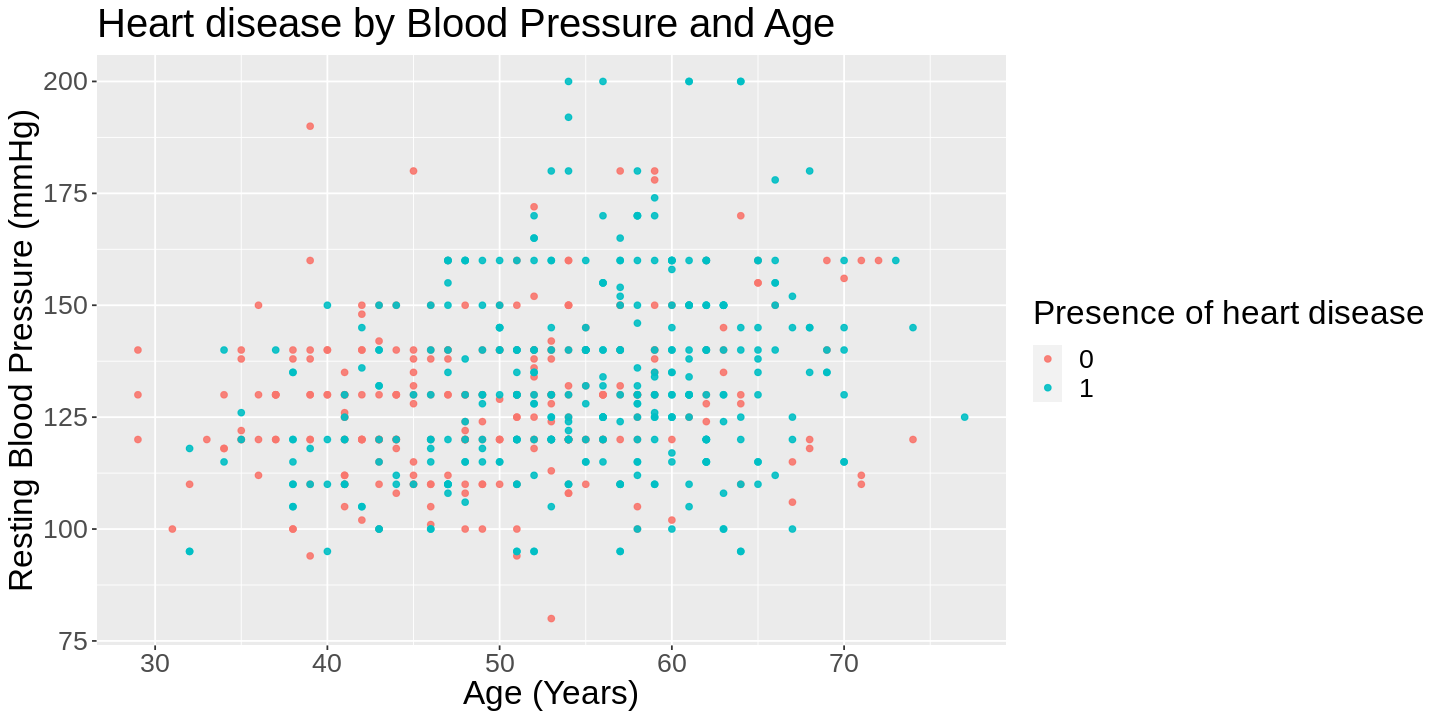

In [14]:
options(repr.plot.width = 12, repr.plot.height = 6)
heart_plot_age_bps <- heart_train |>
                ggplot(aes(x = trestbps, y = age, color = num)) +
                geom_point(alpha = 0.9) +
                theme(text = element_text(size = 20)) +
                labs (x = 'Resting Blood Pressure (mmHg)', y = "Age (Years)", colour = "Presence of heart disease") +
                ggtitle("Heart disease by Blood Pressure and Age") +
                coord_flip()
heart_plot_age_bps

With this scatterplot, there is a weak positive correlation between age and resting blood pressure, and that there is a higher presence of heart disease in older individuals with higher resting blood pressures.

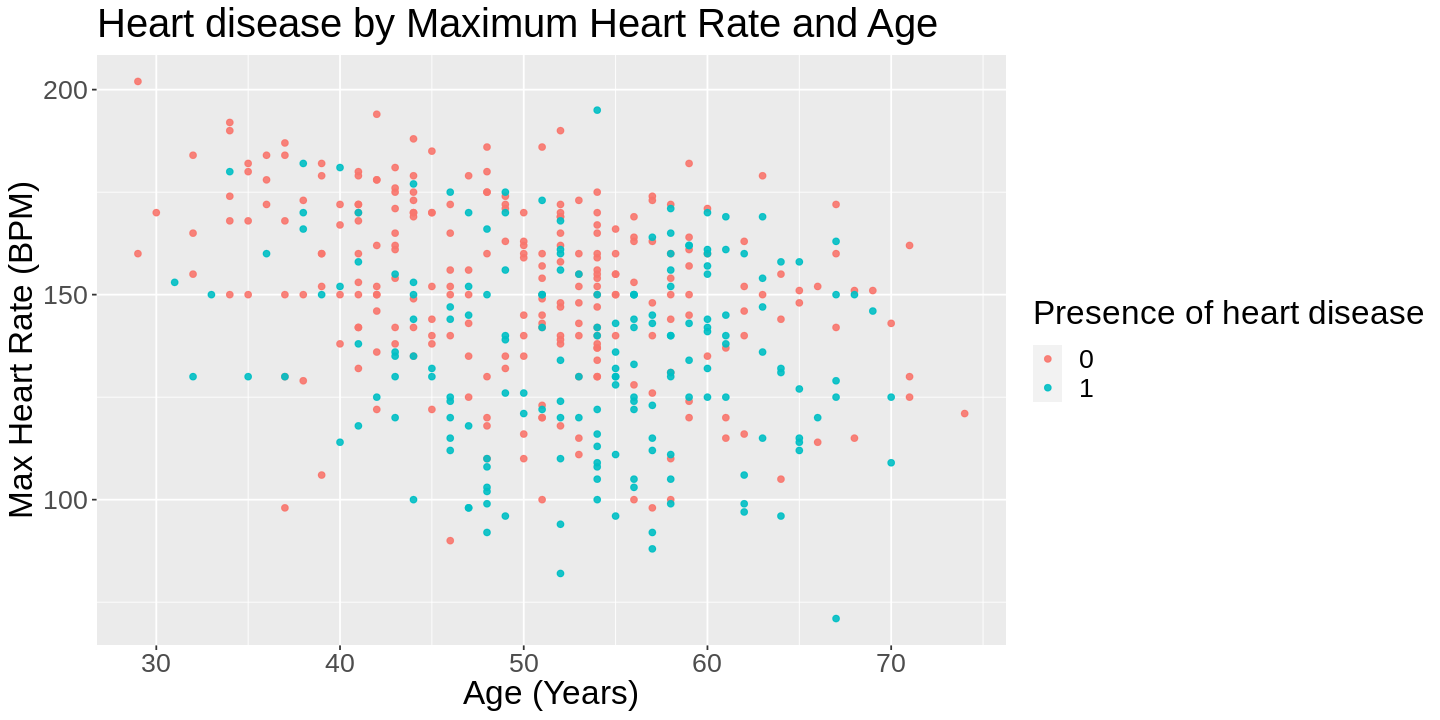

In [18]:
heart_plot_age_maxhr <- heart_train |>
                ggplot(aes(x = max_hr, y = age, color = num)) +
                geom_point(alpha = 0.9) +
                theme(text = element_text(size = 20)) +
                labs (x = 'Max Heart Rate (BPM)', y = "Age (Years)", colour = "Presence of heart disease") +
                ggtitle("Heart disease by Maximum Heart Rate and Age") +
                coord_flip()
heart_plot_age_maxhr

With this scatterplot, there is a weak negative correlation between age and max heart rate, and that there is a higher presence of heart disease in older individuals with smaller max heart rates.

Each variable is weakly related to heart disease on its own. The goal of this project is to see if the *combination* of each of these variables is enough to make accurate heart disease diagnoses. 

[1] 7

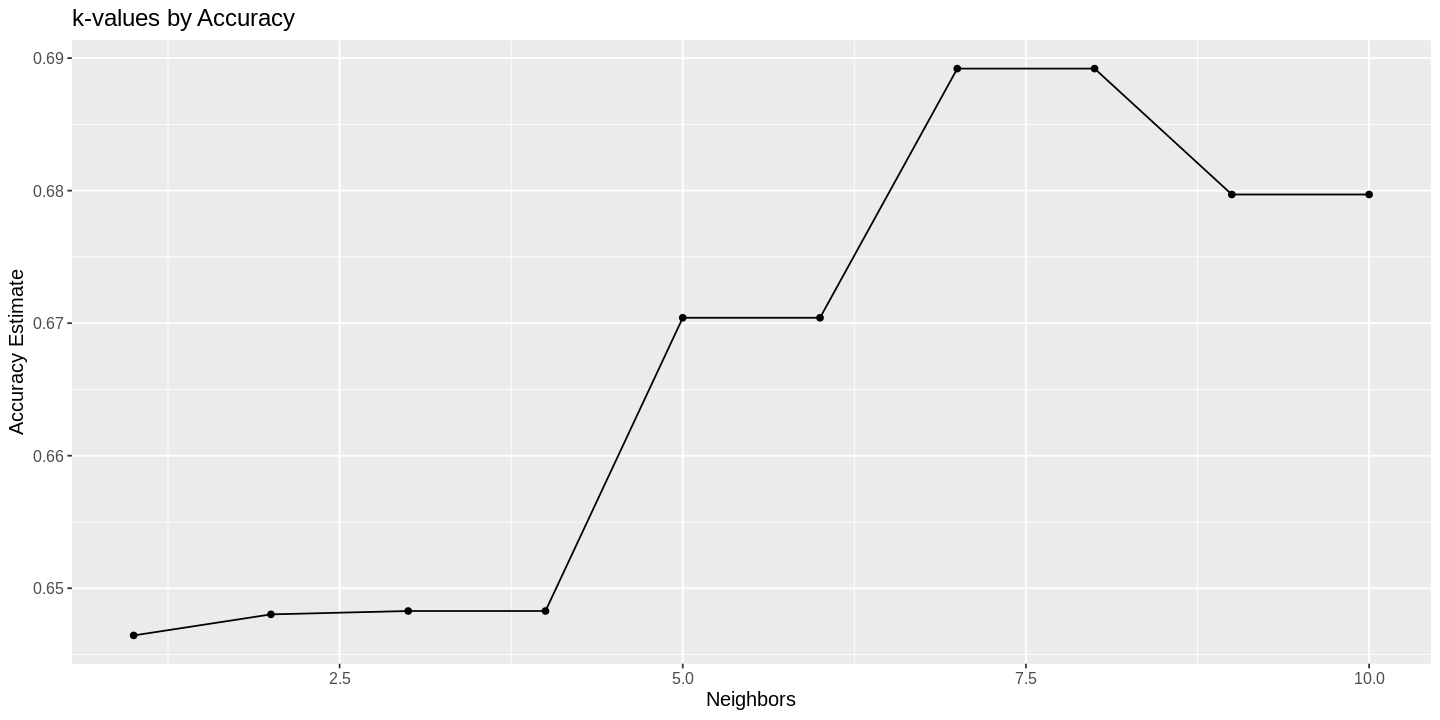

In [15]:
set.seed(727)
# creating the recipe for everything
heart_recipe <- recipe(num ~ age + trestbps + max_hr , data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

data_vfold <- vfold_cv(heart_train, v = 10, strata = num)

# creating the spec for the vfold
knn_spec_v <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


#creating the workflow for the vfold

accuracies <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec_v) |>
  tune_grid(resamples = data_vfold, grid = ks) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

#plot of accuracy by k value
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "k-values by Accuracy") +
  theme(text = element_text(size = 12))

accuracy_vs_k

k_min <- accuracies |>
    arrange(desc(mean)) |>
    slice(1)|>
    pull(neighbors)

# printing the number of ks we use
k_min

We chose to use ***k*** nearest neighbours classification to solve this problem, using 10-fold cross-verification to reduce the impact of random chance on our model. After fitting the model to our training set, we can see from the graph that the best number of ***k*** to use for our training set is 9 (k_min).
We now fit the final model using our chosen k and our training set, and determine the accuracy of it using our testing set. We see that our model is over 70% accurate, which isn’t particularly high but not particularly poor.

In [16]:
set.seed(727)
# creating the spec for the final model
knn_spec_f <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
  set_engine("kknn") |>
  set_mode("classification")

#creating the workflow for the final model
knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec_f) |>
  fit(data = heart_train)

#determining the accuracy using our testing set
predictions <- knn_fit |>
           predict(heart_test) |>
          bind_cols(heart_test |> select(num, age, trestbps, max_hr))

#metrics
metrics <- predictions |>
           metrics(truth = num, estimate = .pred_class)
metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857
kap,binary,0.4054360


In [17]:
#confidence matrix
conf_mat <- predictions |>
    conf_mat(truth = num, estimate = .pred_class)

conf_mat

          Truth
Prediction  0  1
         0 52 20
         1 40 98

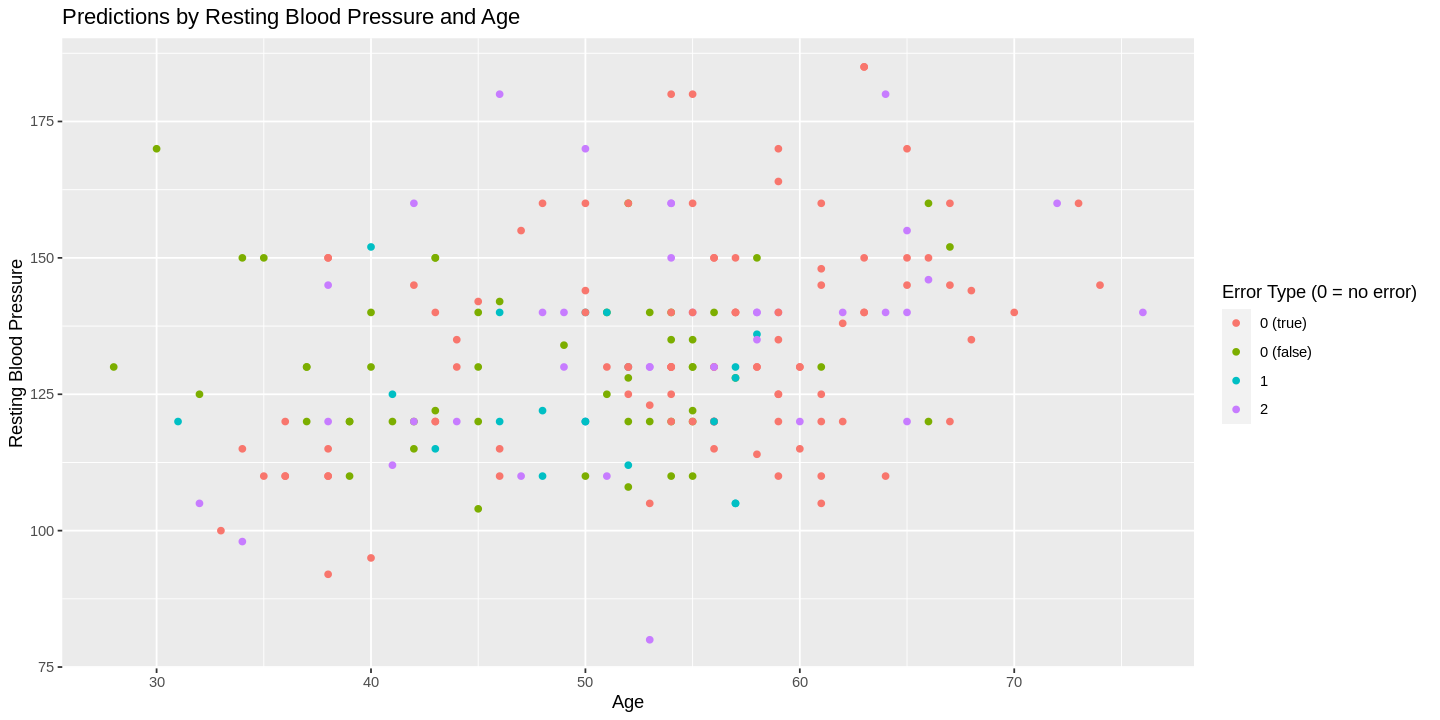

In [18]:
#plot of predictions by error type
errors <- predictions |>
    mutate(error = as_factor(ifelse(num == .pred_class & num == 0, "0 (false)", ifelse(num == .pred_class & num == 1, "0 (true)", ifelse(num == 1, 1, 2)))))
ggplot(errors, aes(x = age, y = trestbps, color = error)) +
  geom_point() +
  labs(x = "Age", y = "Resting Blood Pressure", color = "Error Type (0 = no error)", title = "Predictions by Resting Blood Pressure and Age")

For a closer look into our model, we can look to the confidence matrix. From this, we can see that there are 62 correct false diagnoses, 94 correct true diagnoses, 26 incorrect true diagnoses, and 23 incorrect false diagnoses. Because the number of false-positives (type 1 error) and false-negatives (type 2 error) is around the same, we determine that the model is neither under-fitting nor over-fitting to the data.
To visualize this, we put some of our variables into a scatter plot. Due to the high dimensionality (too many variables) of the model, we cannot visualize using all of our variables, so this plot only includes resting blood pressure and age.

### Discussion

Based on preliminary research, we determined that there's a relationship between heart disease and all of our selected variables. So, we expected that using all four predictors would allow us to predict heart disease diagnosis with decent accuracy. Through a classification exercise we were able to confirm these suspicions and determine that using the choice variables (age, resting blood pressure, and maximum heart rate.) that are inexpensive to test for results in an estimated accuracy of more than 70%.

While this figure is not great enough to replace angiograms entirely, it is significant enough to be effective as a screening test to determine at-risk individuals. Because this model has such a low cost to run, it can be included as a routine step in any checkup, potentially allowing individuals with undiagnosed heart disease to receive the attention they need.

The impact is clear: if we can routinely do cheap tests for heart disease or reduce the number of angiograms needed, it means less costly procedures for physicians and patients, leading to increased access to heart disease diagnoses. Thus directly affecting impoverished or otherwise less fortunate communities, possibly saving lives and changing the healthcare system towards greater accessibility. 

Such explorations and investigations into current health care practices may cause future questions to arise. For example, we may rethink current standard diagnosis practices in medicine and explore easier, less expensive options, including but not limited to heart disease diagnosis and other cardio related disorders. Specifically, one possible question is "What other variables can we use to successfully predict heart disease with even more accuracy?"

### References

(Heart disease data set source) 
Janosi, Andras., Steinbrunn, William., et al. (1988). Heart Disease [Data Set]. UC Irvine Machine Learning Repository. 10.24432/C52P4X

(Heart disease background/ diagnosis method source) 
Stouffer, G., Runge, M. S., et al. (2018). Netter’s Cardiology E-Book. Elsevier Health Sciences. 

(angiogram prices) 
(Updated 2023). Diagnostic Scans. Canada Diagnostic. https://www.canadadiagnostic.com/info/fees/ 